# Install & Import Package

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [ ]:
# LIBRARY UNTUK MENGOLAH DATA
import pandas as pd
import numpy as np
import re,string #import regular expression
import Sastrawi
import joblib

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import matplotlib as mpl

#Library Untuk Split Data
from sklearn import model_selection
from sklearn.model_selection import train_test_split

#Library Ekstraksi Fitur TFIDF
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder

#Library Klasifikasi Support Vector Machine
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import f1_score as f1
from sklearn .metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as recall
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics


#Library HyperParameter Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import timeit

import warnings
warnings.filterwarnings('ignore')

# Import Dataset "Hasil Prepro Sentimen BerAspek Errors

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ulasan_sentimen_errors = pd.read_csv("/content/drive/MyDrive/TA_ADIN_ASBA_STARBUCKS_APP/hasil_prepro_sentimen_errors_starbucks_app.csv")
ulasan_sentimen_errors.shape

(1500, 3)

In [ ]:
ulasan_sentimen_errors['Errors'].value_counts()

-1    793
 0    662
 1     45
Name: Errors, dtype: int64

In [ ]:
#detect missing values
ulasan_sentimen_errors.isna().sum()

Ulasan      0
stemming    0
Errors      0
dtype: int64

# Inisialisasi Data

In [ ]:
x_errors = ulasan_sentimen_errors['stemming'] #hasil stemming
y_errors = ulasan_sentimen_errors['Errors'].values #labelnya

# Split Data

In [ ]:
from sklearn.model_selection import train_test_split

#Perbandingan data train dan data test sebesar 8:2
x_errors_train, x_errors_test, y_errors_train, y_errors_test = train_test_split(
    ulasan_sentimen_errors['stemming'],
    ulasan_sentimen_errors['Errors'],
    test_size=0.2)

train_df = pd.DataFrame()
train_df['Ulasan'] = x_errors_train
train_df['sentiment'] = y_errors_train
test_df = pd.DataFrame()
test_df['Ulasan'] = x_errors_test
test_df['sentiment'] = y_errors_test

# Feature TF-IDF "x_errors"

In [ ]:
#merubah nilai x_errors menjadi sebuah angka bukan teks
tfidf_vect = TfidfVectorizer(use_idf=True)
tfidf_vect.fit(x_errors_train)
x_errors_train_vectorized = tfidf_vect.transform(x_errors_train)
x_errors_test_vectorized = tfidf_vect.transform(x_errors_test)

In [ ]:
print (x_errors_train_vectorized)

  (0, 92)	1.0
  (1, 1452)	0.3311381285825896
  (1, 1395)	0.3022248495498387
  (1, 1271)	0.2723577973042946
  (1, 1238)	0.2772817957534467
  (1, 1031)	0.41244876755766857
  (1, 435)	0.43014614586699546
  (1, 421)	0.4550891996633875
  (1, 252)	0.2927419406070155
  (2, 1406)	0.4849527149638561
  (2, 1176)	0.2954773696236887
  (2, 903)	0.41293431725370944
  (2, 708)	0.32205721741396126
  (2, 497)	0.43951416504398205
  (2, 232)	0.4583728671735835
  (3, 1411)	0.25406355916426615
  (3, 856)	0.5650494599040521
  (3, 654)	0.24748430296300608
  (3, 340)	0.28252472995202604
  (3, 316)	0.30825382804415397
  (3, 17)	0.6165076560883079
  (4, 92)	1.0
  (5, 1397)	0.5522033864595846
  (5, 158)	0.8337094337852768
  (6, 675)	0.8822699235970477
  :	:
  (1196, 879)	0.6371330981991912
  (1196, 220)	0.3487329719300861
  (1196, 66)	0.6873476045407517
  (1197, 1178)	0.48415428424421075
  (1197, 1029)	0.48415428424421075
  (1197, 849)	0.21300251509644239
  (1197, 636)	0.35228685661724174
  (1197, 530)	0.3568021

# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Linear

Kernel Linear memiliki akurasi paling tinggi sebesar 0.9208 (Tanpa Hyperparamater Tunning)

In [ ]:
#Membuat Model dg Kernel Linear
clf_linear = SVC(kernel='linear')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_linear = cross_val_score(clf_linear, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)

#Hasil Setelah dilakukan 5x Fold (cv=5)
print("Accuracy Score Linear of : %0.4f" % (cv_linear.mean()))

Accuracy Score Linear of : 0.8500


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel Polynomial

In [ ]:
#Membuat Model dg Kernel Polynomial
clf_poly = SVC(kernel='poly')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_poly = cross_val_score(clf_poly, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score Poly of : %0.4f" % (cv_poly.mean()))

Accuracy Score Poly of : 0.7300


# Klasifikasi SVM dengan K-Fold Cross Validation Menggunakan Kernel RBF

In [ ]:
#Membuat Model dg Kernel rbf
clf_rbf = SVC(kernel='rbf')

#Evaluasi dg K-Fold Cross Validation
#Menggunakan Data Train untuk Melatih Model
cv_rbf= cross_val_score(clf_rbf, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)

#Hasil Setelah 5lipatan/fold (nilai cv=5)
print("Accuracy Score RBF of : %0.4f" % (cv_rbf.mean()))

Accuracy Score RBF of : 0.8367


# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Linear

In [ ]:
#Tuning Parameter with GridSearchCV
#LINEAR KERNEL

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['linear'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_errors_train_vectorized, y_errors_train)

selected_kernel_linear = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_linear)
selected_C_linear = grid.best_params_['C']
print("Selected C: ", selected_C_linear)
selected_gamma_linear= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_linear)

best_params_linear_HT = grid.best_params_
model_looks_linear_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_linear_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.721 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.696 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.721 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.671 total time=   0.1s
[CV 5/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.662 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.721 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.696 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.721 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.671 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.662 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.721 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel Polynomial

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel Polynomial

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['poly'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_errors_train_vectorized, y_errors_train)


selected_kernel_poly = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_poly)
selected_C_poly= grid.best_params_['C']
print("Selected C: ", selected_C_poly)
selected_gamma_poly = grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_poly)


best_params_poly_HT = grid.best_params_
model_looks_poly_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_poly_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.537 total time=   0.1s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.537 total time=   0.1s
[CV 3/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.537 total time=   0.1s
[CV 4/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.537 total time=   0.1s
[CV 5/5] END ....C=0.1, gamma=0.01, kernel=poly;, score=0.537 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.537 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.537 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.537 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.537 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=poly;, score=0.537 total time=   0.1s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.629 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;

# Klasifikasi SVM (Hyperparameter Tunning) Menggunakan Kernel RBF

Hyperparameter terbaik untuk aspek efficiency ada pada kernel RBF dg C=100, gamma 0.01, score=0.9275

In [ ]:
#Tuning Parameter with GridSearchCV
#Kernel RBF

param_grid = {'C': [0.1, 1, 10, 100],
              'kernel': ['rbf'],
              'gamma' :[0.01, 0.1, 1, 10]
             }

grid = GridSearchCV(svm.SVC(), param_grid, scoring='accuracy', refit = True, verbose = 3)
# fitting the model for grid search
grid.fit(x_errors_train_vectorized, y_errors_train)

selected_kernel_rbf = grid.best_params_['kernel']
print("Selected Kernel: ", selected_kernel_rbf)
selected_C_rbf = grid.best_params_['C']
print("Selected C: ", selected_C_rbf)
selected_gamma_rbf= grid.best_params_['gamma']
print("Selected Gamma: ", selected_gamma_rbf)

best_params_rbf_HT = grid.best_params_
model_looks_rbf_HT= grid.best_estimator_

print(f'Best Score : {grid.best_score_}')
print("best estimator: %s" % (model_looks_rbf_HT))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.1s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.1s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.537 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.604 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.571 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.592 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.596 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.583 total time=   0.1s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.704 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

# K-Fold Cross Validation dengan Hyperparameter Tunning

In [ ]:
cross_val_score_linear= cross_val_score(model_looks_linear_HT, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)
print("Accuracy Score Linear of : %0.4f" % cross_val_score_linear.mean(), cross_val_score_linear.std())

cross_val_score_poly = cross_val_score(model_looks_poly_HT, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)
print("Accuracy Score poly of : %0.4f" % cross_val_score_poly.mean(), cross_val_score_poly.std())

cross_val_score_rbf = cross_val_score(model_looks_rbf_HT, x_errors_train_vectorized, y_errors_train, scoring='accuracy', cv=5)
print("Accuracy Score rbf of : %0.4f" % cross_val_score_rbf.mean(), cross_val_score_rbf.std())

Accuracy Score Linear of : 0.8500 0.009501461875826156
Accuracy Score poly of : 0.7208 0.026874192494328483
Accuracy Score rbf of : 0.8567 0.013070322617798436


# Visualisasi Pengaruh Hyperparameter Tunning pada Model Klasifikasi SVM di Aspek Errors

Hyperparameter tunning pada aspek efficiency hanya berpengaruh pada kernel RBF dengan kenaikan sebesar 0.0075

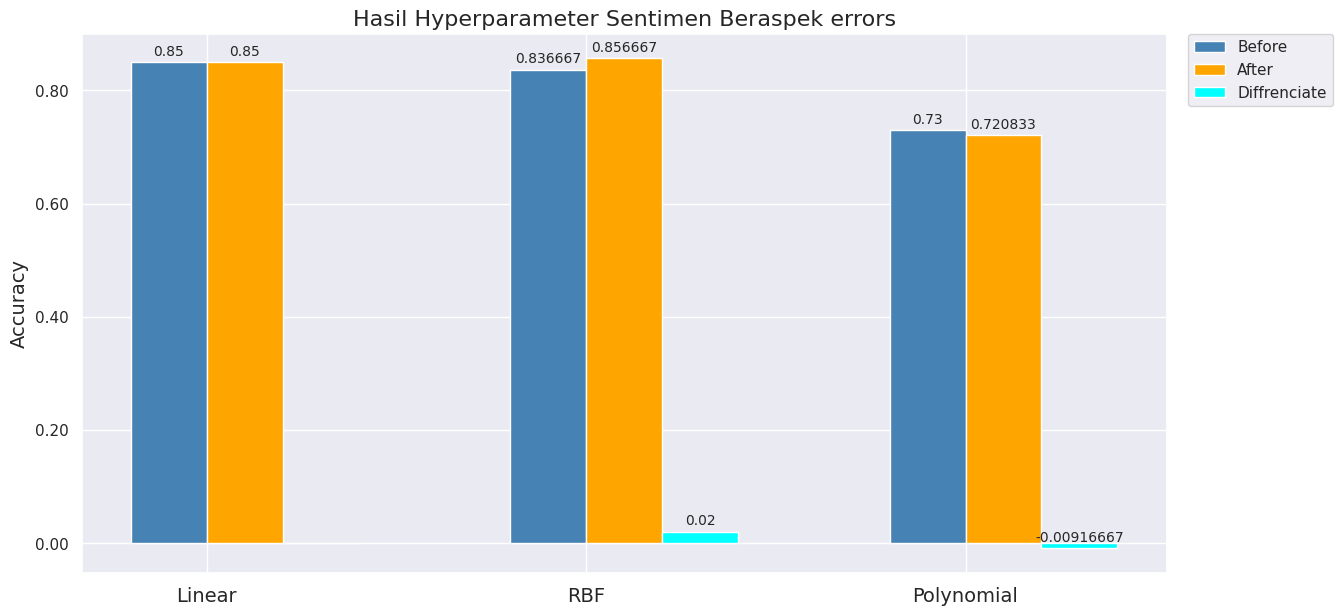

In [ ]:
import numpy as np
from matplotlib.ticker import FormatStrFormatter

import matplotlib.pyplot as plt
%matplotlib inline


name = ['Linear', 'RBF', 'Polynomial']
before_HT = [cv_linear.mean(), cv_rbf.mean(), cv_poly.mean()]
after_HT = [cross_val_score_linear.mean(), cross_val_score_rbf.mean(), cross_val_score_poly.mean()]
diff_linear = ((cross_val_score_linear.mean()-cv_linear.mean()))
diff_rbf = ((cross_val_score_rbf.mean()-cv_rbf.mean()))
diff_poly = ((cross_val_score_poly.mean()-cv_poly.mean()))
diff_HT = [diff_linear, diff_rbf, diff_poly]

x = np.arange(len(name))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 7))

bfr = ax.bar(x - width/2, before_HT, width, label='Before', color='steelblue')
aftr = ax.bar(x + width/2, after_HT, width, label='After', color='orange')
diff = ax.bar(x + 0.3, diff_HT, width, label='Diffrenciate', color='cyan')

ax.set_title('Hasil Hyperparameter Sentimen Beraspek errors', size=16)
ax.set_ylabel('Accuracy', size=14)
ax.set_xticks(x)
ax.set_xticklabels(name, size=14)
ax.legend(fontsize=14)
ax.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
ax.yaxis.set_major_formatter(FormatStrFormatter("%0.2f"))
for p in ax.patches:
    h = p.get_height()
    x = p.get_x()+p.get_width()/2
    if h!= 0:
      ax.annotate("%g" % p.get_height(), xy=(x,h), xytext=(0,5), textcoords="offset points",
                  ha="center", fontsize=10)

plt.show()

# Validasi Model Hyperparameter Tunning Data Test Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_errors_test_vectorized)

print("F1-SCORE ",f1(y_errors_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_test,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_test, grid_predictions))

F1-SCORE  65.74141820620694
ACCURACY  85.33333333333334
PRECISION  68.46816707218167
RECALL 64.28448857020285
Confusion Matrix : 
 [[134  14   0]
 [ 24 121   2]
 [  2   2   1]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.84      0.91      0.87       148
           0       0.88      0.82      0.85       147
           1       0.33      0.20      0.25         5

    accuracy                           0.85       300
   macro avg       0.68      0.64      0.66       300
weighted avg       0.85      0.85      0.85       300



# Validasi Model Hyperparameter Tunning Data Test Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_errors_test_vectorized)

print("F1-SCORE ",f1(y_errors_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_test,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_test, grid_predictions))

F1-SCORE  46.6404961028617
ACCURACY  71.33333333333334
PRECISION  53.54037267080746
RECALL 48.302384016669734
Confusion Matrix : 
 [[146   2   0]
 [ 79  68   0]
 [  5   0   0]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.63      0.99      0.77       148
           0       0.97      0.46      0.63       147
           1       0.00      0.00      0.00         5

    accuracy                           0.71       300
   macro avg       0.54      0.48      0.47       300
weighted avg       0.79      0.71      0.69       300



# Validasi Model Hyperparameter Tunning Data Test RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_errors_test_vectorized)

print("F1-SCORE ",f1(y_errors_test,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_test,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_test,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_test,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_test, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_test, grid_predictions))

F1-SCORE  57.750642381244745
ACCURACY  86.0
PRECISION  57.87629147512631
RECALL 58.287369001654724
Confusion Matrix : 
 [[141   7   0]
 [ 30 117   0]
 [  2   3   0]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.82      0.95      0.88       148
           0       0.92      0.80      0.85       147
           1       0.00      0.00      0.00         5

    accuracy                           0.86       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.85      0.86      0.85       300



# Validasi Model Hyperparameter Tunning Data Train Linear Kernel

In [ ]:
grid_predictions = model_looks_linear_HT.predict(x_errors_train_vectorized)

print("F1-SCORE ",f1(y_errors_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_train,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_train, grid_predictions))

F1-SCORE  87.2177240373488
ACCURACY  95.75
PRECISION  94.45196973447385
RECALL 83.04671232533053
Confusion Matrix : 
 [[631  13   1]
 [ 18 496   1]
 [ 10   8  22]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.96      0.98      0.97       645
           0       0.96      0.96      0.96       515
           1       0.92      0.55      0.69        40

    accuracy                           0.96      1200
   macro avg       0.94      0.83      0.87      1200
weighted avg       0.96      0.96      0.96      1200



# Validasi Model Hyperparameter Tunning Data Train Polynomial Kernel

In [ ]:
grid_predictions = model_looks_poly_HT.predict(x_errors_train_vectorized)

print("F1-SCORE ",f1(y_errors_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_train,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_train, grid_predictions))

F1-SCORE  90.05974246867314
ACCURACY  93.0
PRECISION  95.98994318579769
RECALL 86.1084142394822
Confusion Matrix : 
 [[645   0   0]
 [ 73 442   0]
 [  6   5  29]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.89      1.00      0.94       645
           0       0.99      0.86      0.92       515
           1       1.00      0.72      0.84        40

    accuracy                           0.93      1200
   macro avg       0.96      0.86      0.90      1200
weighted avg       0.94      0.93      0.93      1200



# Validasi Model Hyperparameter Tunning Data Train RBF Kernel

In [ ]:
grid_predictions = model_looks_rbf_HT.predict(x_errors_train_vectorized)

print("F1-SCORE ",f1(y_errors_train,grid_predictions,average='macro') * 100)
print("ACCURACY ",acc(y_errors_train,grid_predictions) * 100)
print("PRECISION ",prec(y_errors_train,grid_predictions,average='macro') * 100)
print("RECALL",recall(y_errors_train,grid_predictions,average='macro') * 100)

print('Confusion Matrix : \n', confusion_matrix(y_errors_train, grid_predictions))
print('Report Hasil : \n',classification_report(y_errors_train, grid_predictions))

F1-SCORE  61.40198253145617
ACCURACY  90.75
PRECISION  60.403138528138534
RECALL 62.436466721858466
Confusion Matrix : 
 [[617  28   0]
 [ 43 472   0]
 [ 12  28   0]]
Report Hasil : 
               precision    recall  f1-score   support

          -1       0.92      0.96      0.94       645
           0       0.89      0.92      0.91       515
           1       0.00      0.00      0.00        40

    accuracy                           0.91      1200
   macro avg       0.60      0.62      0.61      1200
weighted avg       0.88      0.91      0.89      1200

